#### Sami Ramzi Chibane ©

In [1]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import time
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

'1.0.1'

#### Cas 1 : Construction du réseau PIETON de Grenoble-Alpes Métropole

In [3]:
Grenoble_Alpes_Metropole = ['Bresson, Isère, Auvergne-Rhône-Alpes, France', 
'Brié-et-Angonnes, Isère, Auvergne-Rhône-Alpes, France', 
'Champagnier, Isère, Auvergne-Rhône-Alpes, France', 
'Champ-sur-Drac, Isère, Auvergne-Rhône-Alpes, France', 
'Claix, Isère, Auvergne-Rhône-Alpes, France', 
'Corenc, Isère, Auvergne-Rhône-Alpes, France', 
'Domène, Isère, Auvergne-Rhône-Alpes, France', 
'Échirolles, Isère, Auvergne-Rhône-Alpes, France', 
'Eybens, Isère, Auvergne-Rhône-Alpes, France', 
'Fontaine, Isère, Auvergne-Rhône-Alpes, France', 
'Fontanil-Cornillon, Isère, Auvergne-Rhône-Alpes, France', 
'Gières, Isère, Auvergne-Rhône-Alpes, France', 
'Grenoble, Isère, Auvergne-Rhône-Alpes, France', 
'Herbeys, Isère, Auvergne-Rhône-Alpes, France', 
'Jarrie, Isère, Auvergne-Rhône-Alpes, France', 
'La Tronche, Isère, Auvergne-Rhône-Alpes, France', 
'Le Gua, Isère, Auvergne-Rhône-Alpes, France', 
'Le Pont-de-Claix, Isère, Auvergne-Rhône-Alpes, France', 
'Le Sappey-en-Chartreuse, Isère, Auvergne-Rhône-Alpes, France', 
'Meylan, Isère, Auvergne-Rhône-Alpes, France', 
'Miribel-Lanchâtre, Isère, Auvergne-Rhône-Alpes, France', 
'Montchaboud, Isère, Auvergne-Rhône-Alpes, France', 
'Mont-Saint-Martin, Isère, Auvergne-Rhône-Alpes, France', 
'Murianette, Isère, Auvergne-Rhône-Alpes, France', 
'Notre-Dame-de-Commiers, Isère, Auvergne-Rhône-Alpes, France', 
'Notre-Dame-de-Mésage, Isère, Auvergne-Rhône-Alpes, France', 
'Noyarey, Isère, Auvergne-Rhône-Alpes, France', 
'Poisat, Isère, Auvergne-Rhône-Alpes, France', 
'Proveysieux, Isère, Auvergne-Rhône-Alpes, France', 
'Quaix-en-Chartreuse, Isère, Auvergne-Rhône-Alpes, France', 
'Saint-Barthélemy-de-Séchilienne, Isère, Auvergne-Rhône-Alpes, France', 
'Saint-Égrève, Isère, Auvergne-Rhône-Alpes, France', 
'Saint-Georges-de-Commiers, Isère, Auvergne-Rhône-Alpes, France', 
'Saint-Martin-d\'Hères, Isère, Auvergne-Rhône-Alpes, France', 
'Saint-Martin-le-Vinoux, Isère, Auvergne-Rhône-Alpes, France', 
'Saint-Paul-de-Varces, Isère, Auvergne-Rhône-Alpes, France', 
'Saint-Pierre-de-Mésage, Isère, Auvergne-Rhône-Alpes, France', 
'Sarcenas, Isère, Auvergne-Rhône-Alpes, France', 
'Sassenage, Isère, Auvergne-Rhône-Alpes, France', 
'Séchilienne, Isère, Auvergne-Rhône-Alpes, France', 
'Seyssinet-Pariset, Isère, Auvergne-Rhône-Alpes, France', 
'Seyssins, Isère, Auvergne-Rhône-Alpes, France', 
'Varces-Allières-et-Risset, Isère, Auvergne-Rhône-Alpes, France', 
'Vaulnaveys-le-Bas, Isère, Auvergne-Rhône-Alpes, France', 
'Vaulnaveys-le-Haut, Isère, Auvergne-Rhône-Alpes, France', 
'Venon, Isère, Auvergne-Rhône-Alpes, France', 
'Veurey-Voroize, Isère, Auvergne-Rhône-Alpes, France', 
'Vif, Isère, Auvergne-Rhône-Alpes, France', 
'Vizille, Isère, Auvergne-Rhône-Alpes, France']

In [4]:
s_time = time.time()
gre_metro_gdf = ox.geocoder.geocode_to_gdf(Grenoble_Alpes_Metropole)
gre_metro_gdf_projection = ox.project_gdf(gre_metro_gdf)
print('Took {:,.2f} seconds'.format(time.time() - s_time))

Took 0.31 seconds


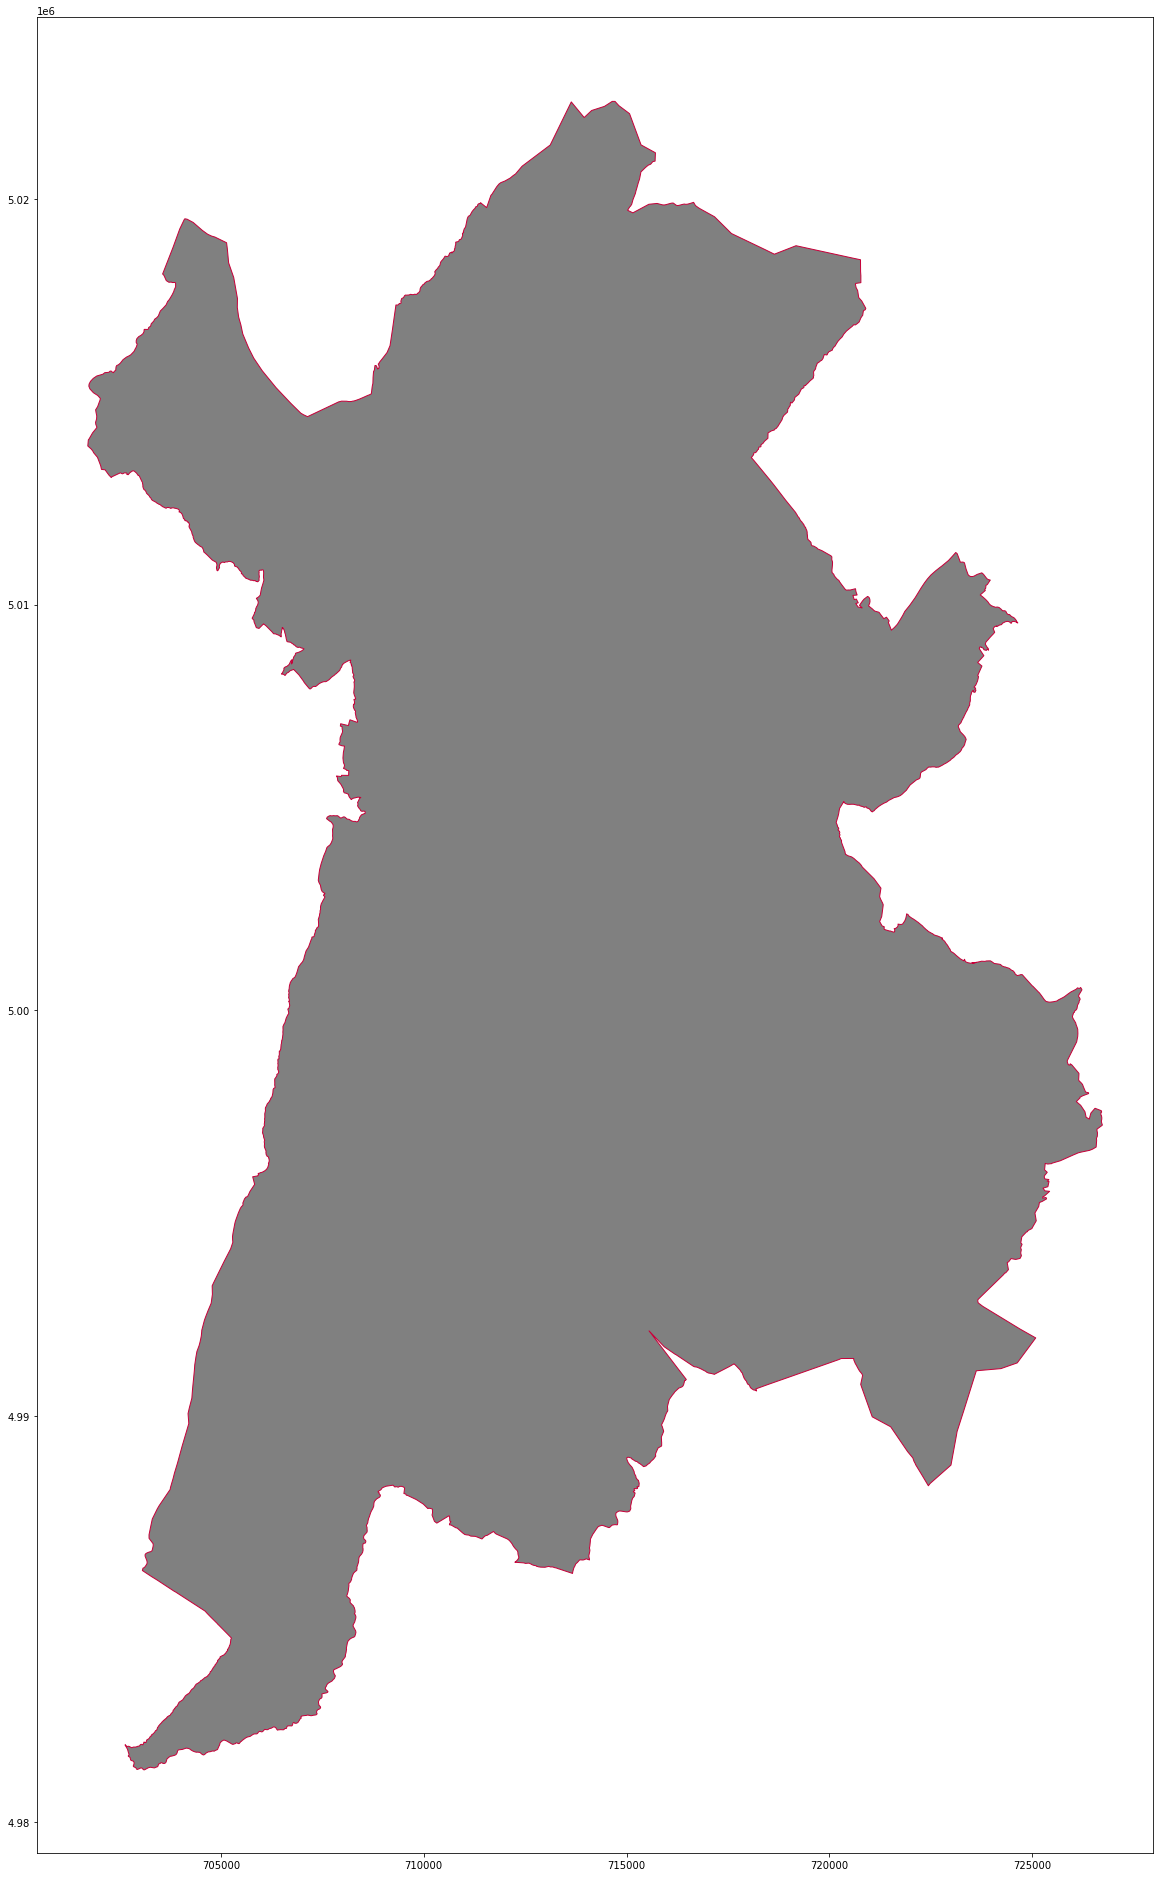

In [5]:
city = ox.geocode_to_gdf('Grenoble_Alpes_Metropole')
ax = ox.project_gdf(city).plot(fc='gray', ec='#C70039', figsize=(20,35))
_ = ax.axis('on')

In [6]:
s_time = time.time()
gro_metro_graphe = ox.graph_from_place(Grenoble_Alpes_Metropole, network_type='walk')
print('Took {:,.2f} seconds'.format(time.time() - s_time))

C:\Users\Chibane\anaconda3\envs\ox\lib\site-packages\osmnx\utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\Chibane\anaconda3\envs\ox\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\Chibane\anaconda3\envs\ox\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Took 63.36 seconds


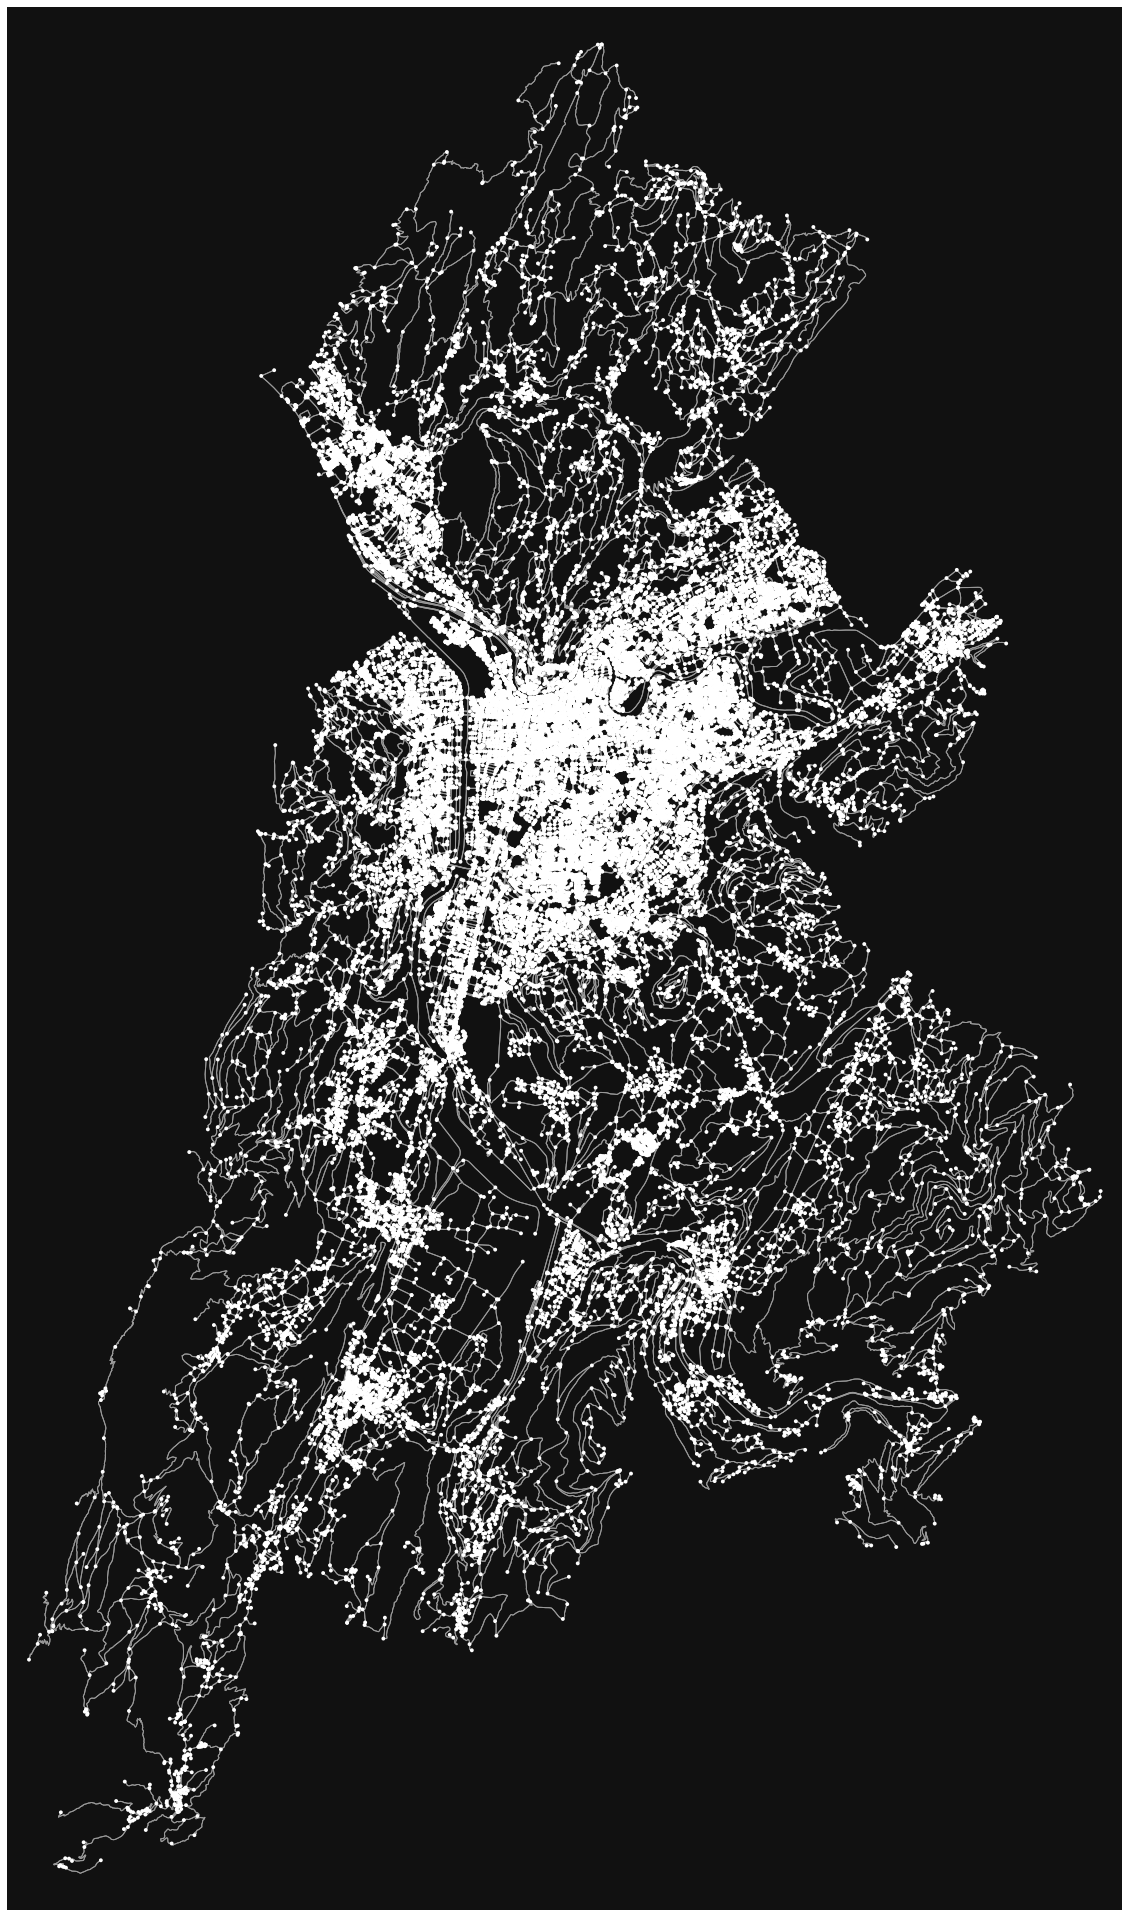

(<Figure size 1440x2520 with 1 Axes>, <AxesSubplot:>)

In [7]:
ox.plot_graph(gro_metro_graphe, figsize=(20,35), save=False)

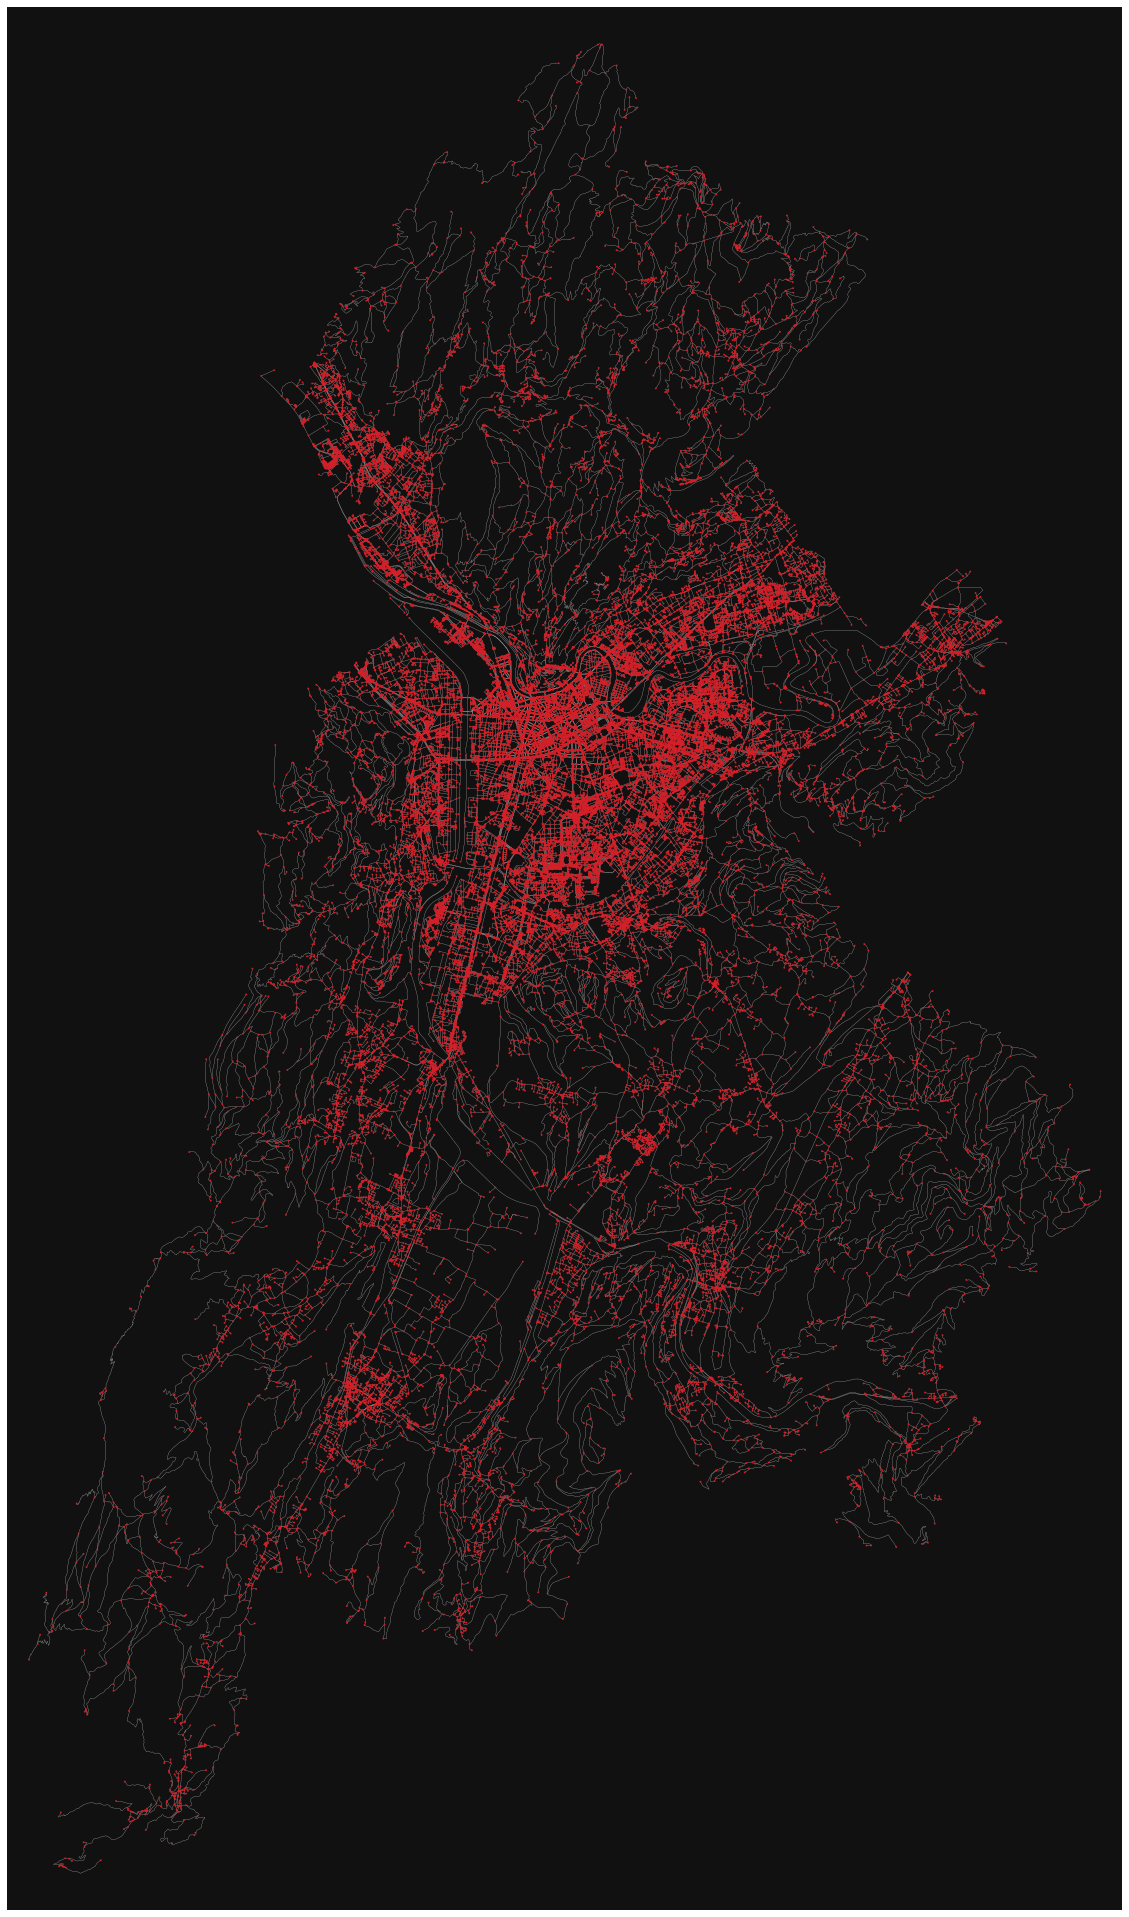

Took 16.10 seconds


In [8]:
s_time = time.time()

ox.plot_graph(gro_metro_graphe, figsize=(20,35),
              save=False, 
              node_color='#d31f28',
              node_size=3.5,
              edge_linewidth=0.2)

print('Took {:,.2f} seconds'.format(time.time() - s_time))

#### Calculer quelques statistiques de base de notre graphe

In [9]:
graph_area_m = gre_metro_gdf_projection.unary_union.convex_hull.area
print('{:,.2f} m²'.format(graph_area_m))
print('{:,.2f} km²'.format(graph_area_m / 1000000))

793,760,653.45 m²
793.76 km²


In [10]:
basic_stats = ox.basic_stats(gro_metro_graphe)

#### Afficher les résultats des statistiques de base

In [11]:
print('number of nodes in the graph = {:,.2f}'.format(basic_stats['n']))
print('number of edges in the graph = {:,.2f}'.format(basic_stats['m']))
print('average node degree of the graph = {:,.2f}'.format(basic_stats['k_avg']))
print('number of intersections in graph = {:,.2f}'.format(basic_stats['intersection_count']))
print('how many streets = {:,.2f}'.format(basic_stats['streets_per_node_avg']))
print('streets_per_node_counts :')
print(basic_stats['streets_per_node_counts'])
print('streets_per_node_proportion :')
print(basic_stats['streets_per_node_proportion'])
print('sum of all edges in the undirected = {:,.2f}'.format(basic_stats['edge_length_total']))
print('mean edge length in the undirected = {:,.2f}'.format(basic_stats['edge_length_avg']))
print('number of edges in the undirected = {:,.2f}'.format(basic_stats['street_length_total']))
print('intersection_count divided by area = {:,.2f} km²'.format(basic_stats['street_length_avg']))
print('edge_length_total divided by area = {:,.2f} km²'.format(basic_stats['street_segments_count']))

number of nodes in the graph = 56,968.00
number of edges in the graph = 157,014.00
average node degree of the graph = 5.51
number of intersections in graph = 44,984.00
how many streets = 2.76
streets_per_node_counts :
{0: 0, 1: 11984, 2: 0, 3: 34979, 4: 9671, 5: 302, 6: 29, 7: 3}
streets_per_node_proportion :
{0: 0.0, 1: 0.21036371296166267, 2: 0.0, 3: 0.6140113748069091, 4: 0.1697619716331976, 5: 0.005301221738519871, 6: 0.0005090577166128353, 7: 5.266114309787951e-05}
sum of all edges in the undirected = 9,998,809.42
mean edge length in the undirected = 63.68
number of edges in the undirected = 4,999,404.71
intersection_count divided by area = 63.68 km²
edge_length_total divided by area = 78,507.00 km²


In [12]:
basic_stats

{'n': 56968,
 'm': 157014,
 'k_avg': 5.512357814913636,
 'intersection_count': 44984,
 'streets_per_node_avg': 2.761374806909142,
 'streets_per_node_counts': {0: 0,
  1: 11984,
  2: 0,
  3: 34979,
  4: 9671,
  5: 302,
  6: 29,
  7: 3},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.21036371296166267,
  2: 0.0,
  3: 0.6140113748069091,
  4: 0.1697619716331976,
  5: 0.005301221738519871,
  6: 0.0005090577166128353,
  7: 5.266114309787951e-05},
 'edge_length_total': 9998809.41999994,
 'edge_length_avg': 63.68100564280854,
 'street_length_total': 4999404.7099999515,
 'street_length_avg': 63.6810056428083,
 'street_segments_count': 78507,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.1075655507880326,
 'self_loop_proportion': 0.0022545760250678283,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

#### Calculez des statistiques étendues 

In [13]:
extended_stats = ox.extended_stats(gro_metro_graphe)

In [ ]:
extended_stats

In [ ]:
ox.utils_graph.count_streets_per_node(gro_metro_graphe)